In [50]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# A simple quadratic function
def f(x):
    return 3*x**2 - 4*x + 5

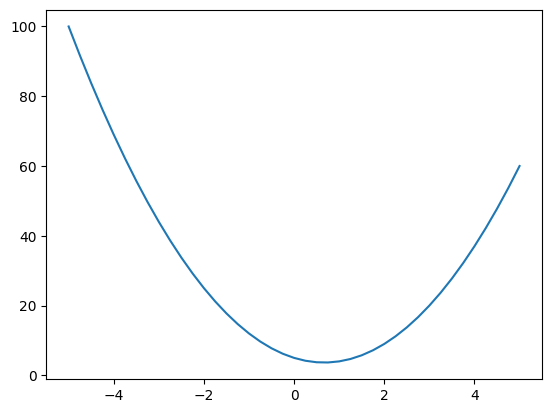

In [52]:
xs = np.arange(-5.0, 5.25, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [69]:
class Value:
    def __init__(self, data, _children=(), _operations='', label=''):
        self.data = data
        self._prev = set(_children)
        self._operations = _operations
        self.label = label
        self.gradient = 0
    
    def __repr__(self):
        return f"Value(label={self.label}, data={self.data})"

    def set_label(self, l=''):
        self.label = l

    def set_gradient(self, g=0):
        self.gradient = g

    def __add__(self, val):
        return Value(self.data + val.data, (self, val), '+')

    def __mul__(self, val):
        return Value(self.data * val.data, (self, val), '*')
        


In [59]:
from graphviz import Digraph

In [60]:
def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges
    
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | gradient %.4f }" % (n.label, n.data, n.gradient,), shape='record')
    if n._operations:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._operations, label = n._operations)
      # and connect this node to it
      dot.edge(uid + n._operations, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._operations)

  return dot

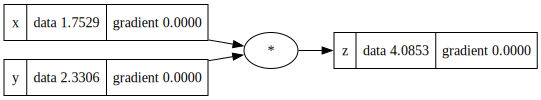

In [64]:
x = Value(1.7529, label='x')
y = Value(2.3306, label='y')
z = x * y
z.set_label('z')
draw_dot(z)

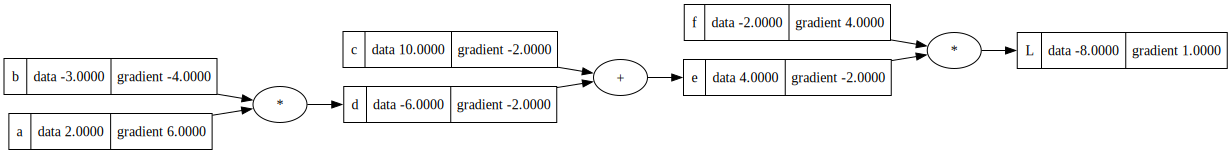

In [81]:
def find_derivatives(): 
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    d = a * b
    d.set_label('d')
    e = d + c
    e.set_label('e')
    f = Value(-2.0, label='f')
    L = e * f
    L.set_label('L')

    # 1. By Default gradient of L is 1.0 i.e. dL/dL = 1
    L.set_gradient(1.0)

    # As L = e * f 
    
    # 2. dL/de = f | i.e. e.grad = f (-2)
    e.set_gradient(f.data)
    
    # 3. dL/df = e | i.e. f.grad = e (4)
    f.set_gradient(e.data)

    # 4. dL/dc = ?
    # dL/dc = de/dc * dL/de
    
    # e = c + d
    # de/dc = 1 

    # dL/dc = de/dc * dL/de | 1 * -2
    # dL/dc = -2
    c.set_gradient(-2)
    d.set_gradient(-2)

    # 5.  
    a.set_gradient(d.gradient * b.data)
    b.set_gradient(d.gradient * a.data)
    
    return draw_dot(L)

find_derivatives()

In [86]:
def lol():
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    d = a * b
    d.set_label('d')
    e = d + c
    e.set_label('e')
    f = Value(-2.0, label='f')
    L = e * f
    L.set_label('L')
    L1 = L.data

    a = Value(2.0, label='a')
    # a.data += h
    b = Value(-3.0, label='b')
    # b.data += h
    c = Value(10.0, label='c')
    d = a * b
    d.set_label('d')
    e = d + c
    # e.data += h
    e.set_label('e')
    f = Value(-2.0, label='f')
    L = e * f
    L.set_label('L')
    L2 = L.data
    
    print((L2 - L1) / h)

lol()

0.0
